In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cats = ['Movie ID', 'Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 
        'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = np.genfromtxt('data/movies.txt', delimiter='\t', dtype=None, encoding='utf-8', names=cats, deletechars='')
data = np.loadtxt('data/data.txt').astype(int)

In [2]:
# Movie data needs to be processed to remove years in parentheses
# This will make visualizations cleaner later on
parse_titles = []
years = []
for i in range(len(movies['Title'])): 
    title = movies['Title'][i]
    j = title.find("(19")
    parse_titles.append(title[0:j].strip())
    years.append(title[j+1:j+5])

## Section 4
**4.1**: All ratings in the MovieLens Dataset

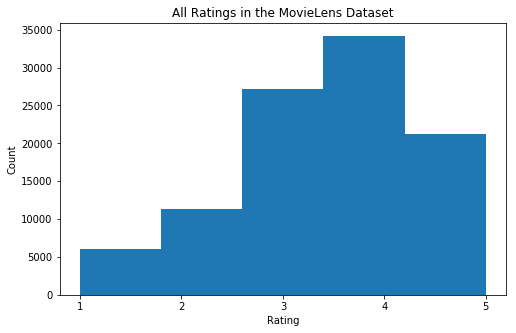

In [3]:
plt.figure(figsize=(8,5))
plt.hist(data[:,2], bins=5);
plt.xticks(np.arange(1,6));
plt.xlabel('Rating');
plt.ylabel('Count');
plt.title('All Ratings in the MovieLens Dataset');

**4.2**: All ratings of the ten most popular movies

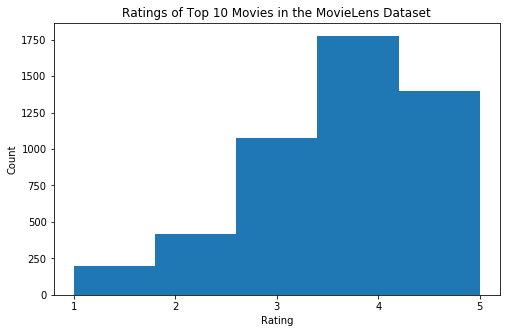

In [4]:
# get index of top 10 movies with most ratings
top10 = np.argpartition(np.bincount(data[:,1]), -10)[-10:]
# get indices of data corresponding to these movies
top10_data = np.nonzero(np.isin(data[:,1], top10))
# get the data itself
top10ratings = data[top10_data,:][0]
# plot the data in a histogram
plt.figure(figsize=(8,5))
plt.hist(top10ratings[:,2], bins=5);
plt.xticks(np.arange(1,6));
plt.xlabel('Rating');
plt.ylabel('Count');
plt.title('Ratings of Top 10 Movies in the MovieLens Dataset');

**4.3**: All ratings of the ten best movies

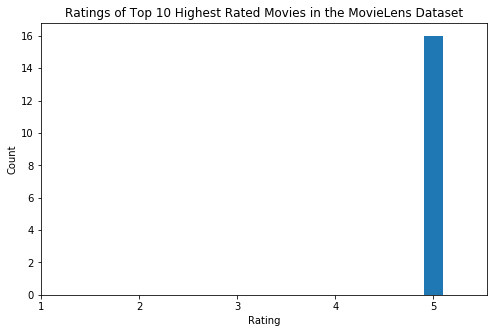

In [5]:
# get average ratings for the movies
avg_ratings = []
for j in range(len(movies['Title'])):
    avg_ratings.append(np.mean(data[np.where(data[:,1] == j + 1), 2]))
    
# get index of movies with top 10 ratings
top10ratings = np.argpartition(np.asarray(avg_ratings),-10)[-10:]+1
# get indices of data corresponding to these movies
top10ratings_data = np.nonzero(np.isin(data[:,1], top10ratings))
# get the data itself
ratings_data = data[top10ratings_data,:][0]
# plot the data in a histogram
plt.figure(figsize=(8,5))
plt.hist(ratings_data[:,2], bins=5);
plt.xticks(np.arange(1,6));
plt.xlabel('Rating');
plt.ylabel('Count');
plt.title('Ratings of Top 10 Highest Rated Movies in the MovieLens Dataset');

**4.4**: All ratings from Action, Adventure and Animation

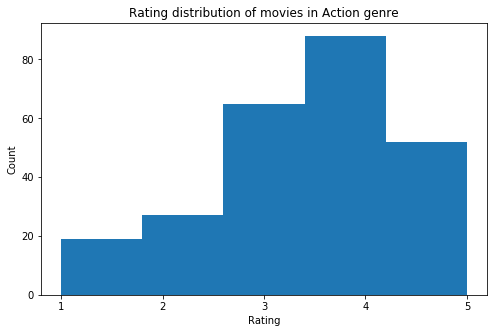

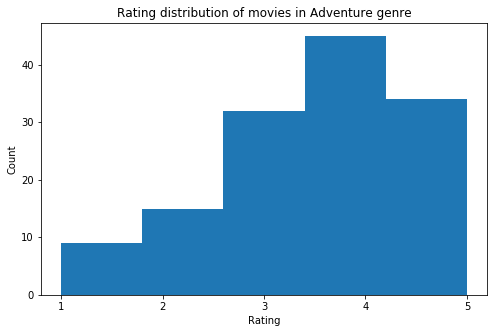

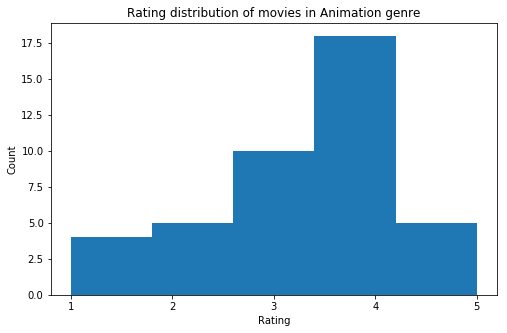

In [6]:
genres = ['Action','Adventure','Animation']
for genre in genres:
    genre_data = np.array(np.where(movies[genre] == 1))[0]
    plt.subplots(figsize=(8,5))
    plt.hist(data[genre_data,2], bins=5)
    plt.xticks(np.arange(1,6));
    plt.xlabel('Rating');
    plt.ylabel('Count');
    plt.title('Rating distribution of movies in {} genre'.format(genre));